Prepare the dataset and train a model on the data.

In [1]:
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
sys.path.append(project_root)

from examples.mia.tabular_mia.utils.adult_data_preparation import preprocess_adult_dataset, get_adult_dataloaders, download_adult_dataset
from examples.mia.tabular_mia.utils.adult_model_preparation import AdultNet, create_trained_model_and_metadata


# Generate the dataset and dataloaders
path = os.path.join(os.getcwd(), "data/")

download_adult_dataset(path)
dataset = preprocess_adult_dataset(path)

n_features = dataset.x.shape[1]
n_classes = 1
train_loader, test_loader = get_adult_dataloaders(dataset, train_fraction=0.3, test_fraction=0.3)

# Train the model
if not os.path.exists("target"):
    os.makedirs("target")
model = AdultNet(input_size=n_features, hidden_size=64, num_classes=n_classes)
train_acc, train_loss, test_acc, test_loss = create_trained_model_and_metadata(model, 
                                                                               train_loader, 
                                                                               test_loader, 
                                                                               epochs=10)

Directory already exists: /home/johan/project/LeakPro/examples/mia/tabular_mia/data/


Training Progress: 100%|██████████| 10/10 [00:03<00:00,  2.84it/s]


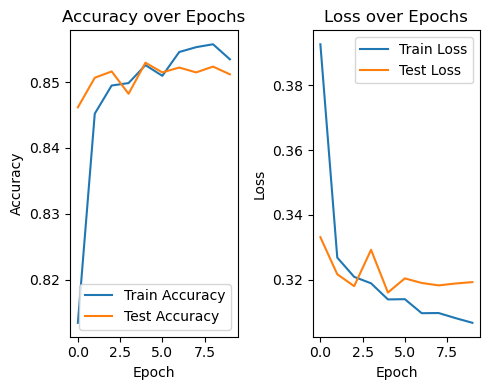

In [2]:
import matplotlib.pyplot as plt

# Plot training and test accuracy
plt.figure(figsize=(5, 4))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(test_acc, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

# Plot training and test loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

Create LeakPro objects and run attack

In [3]:
from adult_handler import AdultInputHandler

from leakpro import LeakPro

# Read the config file
config_path = "audit.yaml"

# Prepare leakpro object
leakpro = LeakPro(AdultInputHandler, config_path)

# Run the audit 
leakpro.run_audit()

ModuleNotFoundError: No module named 'leakpro.user_inputs'